In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: import the dataset

In [3]:
house_data_train = pd.read_csv("train.csv")

In [4]:
house_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Step 2: Feature Engineering -> Remove/Fill the null values

In [6]:
house_data_train.shape

(1460, 81)

In [7]:
house_data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

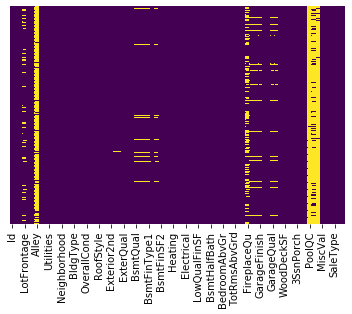

In [8]:
sns.heatmap(house_data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house_data_train['LotFrontage'] = house_data_train['LotFrontage'].fillna(house_data_train['LotFrontage'].mean())

In [11]:
house_data_train.drop(['Alley'],axis=1,inplace=True)

In [12]:
house_data_train['MasVnrType'] = house_data_train['MasVnrType'].fillna(house_data_train['MasVnrType'].mode()[0])
house_data_train['MasVnrArea'] = house_data_train['MasVnrArea'].fillna(house_data_train['MasVnrArea'].mode()[0])

In [13]:
house_data_train['BsmtQual'] = house_data_train['BsmtQual'].fillna(house_data_train['BsmtQual'].mode()[0])
house_data_train['BsmtCond'] = house_data_train['BsmtCond'].fillna(house_data_train['BsmtCond'].mode()[0])
house_data_train['BsmtExposure'] = house_data_train['BsmtExposure'].fillna(house_data_train['BsmtExposure'].mode()[0])
house_data_train['BsmtFinType1'] = house_data_train['BsmtFinType1'].fillna(house_data_train['BsmtFinType1'].mode()[0])
house_data_train['BsmtFinType2'] = house_data_train['BsmtFinType2'].fillna(house_data_train['BsmtFinType2'].mode()[0])
house_data_train['Electrical'] = house_data_train['Electrical'].fillna(house_data_train['Electrical'].mode()[0])
house_data_train['GarageType'] = house_data_train['GarageType'].fillna(house_data_train['GarageType'].mode()[0])
house_data_train['GarageFinish'] = house_data_train['GarageFinish'].fillna(house_data_train['GarageFinish'].mode()[0])
house_data_train['GarageQual'] = house_data_train['GarageQual'].fillna(house_data_train['GarageQual'].mode()[0])
house_data_train['GarageCond'] = house_data_train['GarageCond'].fillna(house_data_train['GarageCond'].mode()[0])
house_data_train['FireplaceQu'] = house_data_train['FireplaceQu'].fillna(house_data_train['FireplaceQu'].mode()[0])

In [14]:
house_data_train.drop(['PoolQC'],axis=1,inplace=True)
house_data_train.drop(['Fence'],axis=1,inplace=True)
house_data_train.drop(['MiscFeature'],axis=1,inplace=True)

In [15]:
house_data_train.drop(['GarageYrBlt'],axis=1,inplace=True)

In [16]:
house_data_train.drop(['Id'],axis=1,inplace=True)

In [17]:
house_data_train.shape

(1460, 75)

In [18]:
house_data_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

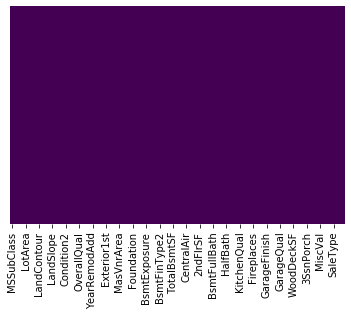

In [19]:
sns.heatmap(house_data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
house_data_train.shape

(1460, 75)

In [21]:
house_data_train.dropna(inplace=True)

In [22]:
house_data_train.shape

(1460, 75)

In [23]:
house_data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
# Handle Categorical Features

In [25]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [26]:
def categorical_encoding(multcolumns):
    final_data = data_final
    i =0
    for fields in multcolumns:
        print(fields)
        data1=pd.get_dummies(data_final[fields],drop_first=True)
        data_final.drop([fields],axis=1,inplace=True)
        if i == 0:
            final_data = data1.copy()
        else:
            final_data = pd.concat([final_data,data1],axis=1)
        i = i+1
    final_data = pd.concat([data_final,final_data],axis=1)
    return final_data

In [27]:
main_data = house_data_train.copy()

In [28]:
test_data = pd.read_csv("test_data.csv")

In [29]:
test_data.shape

(1459, 76)

In [30]:
test_data.drop(['Id','GarageYrBlt'],axis=1,inplace=True)

In [31]:
test_data.shape

(1459, 74)

In [32]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [33]:
data_final = pd.concat([house_data_train,test_data],axis=0)

In [34]:
data_final.shape

(2919, 75)

In [35]:
data_final['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [36]:
data_final.shape

(2919, 75)

In [37]:
data_final = categorical_encoding(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
data_final.shape

(2919, 236)

In [39]:
data_final = data_final.loc[:,~data_final.columns.duplicated()]

In [40]:
data_final.shape

(2919, 176)

In [41]:
data_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [42]:
df_train = data_final.iloc[:1460,:]
df_test = data_final.iloc[1460:,:]

In [43]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_train.shape

(1460, 176)

In [46]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

In [47]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [55]:
import xgboost
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [56]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [57]:
y_pred=regressor.predict(df_test)

In [58]:
y_pred

array([122548.37, 160994.97, 184981.12, ..., 175130.5 , 120274.3 ,
       237327.53], dtype=float32)

In [59]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [60]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)